In [1]:
import pandas as pd

# Step 1: Data Exploration and Understanding
# Load the dataset
dataset = pd.read_csv('seattle_weather.csv')

# Check the dimensions of the dataset
print("Dataset dimensions:", dataset.shape)

Dataset dimensions: (1461, 6)


In [2]:
# View the column names
print("Column names:", dataset.columns)

Column names: Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [3]:
# Display the first few rows of the dataset
print("Sample data:")
print(dataset.head(10))

Sample data:
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
5  2012-01-06            2.5       4.4       2.2   2.2     rain
6  2012-01-07            0.0       7.2       2.8   2.3     rain
7  2012-01-08            0.0      10.0       2.8   2.0      sun
8  2012-01-09            4.3       9.4       5.0   3.4     rain
9  2012-01-10            1.0       6.1       0.6   3.4     rain


In [4]:
# Check the data types of each column
print("Data types:")
print(dataset.dtypes)

Data types:
date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


In [5]:
# Check for missing values
print("Missing values:")
print(dataset.isnull().sum())

Missing values:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [6]:
# Get basic statistics of the dataset
print("Summary statistics:")
print(dataset.describe())

Summary statistics:
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


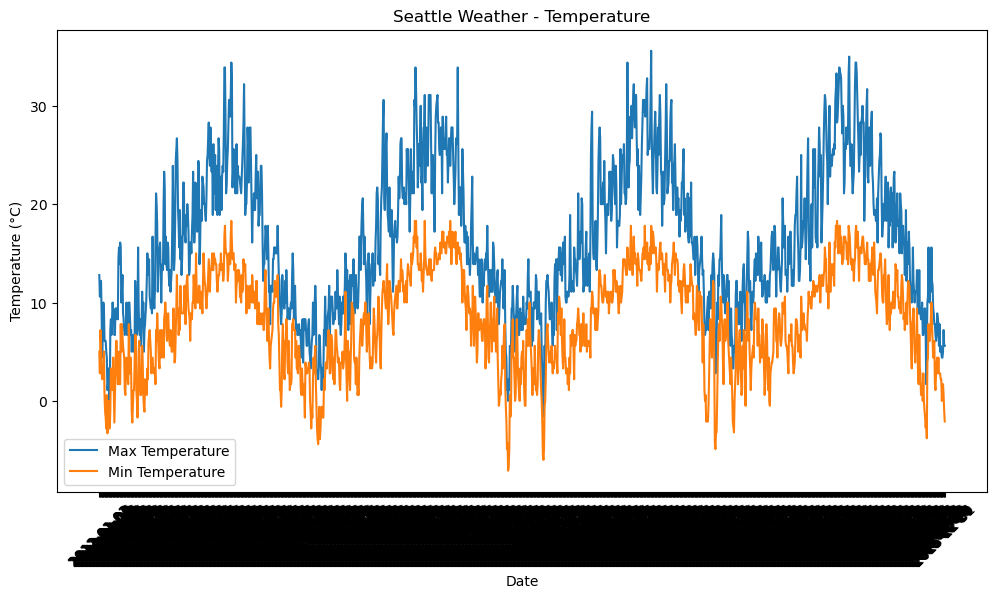

In [10]:
import matplotlib.pyplot as plt

# Step 2: Data Visualization

# A. Line plot of temperature

# Extract the temperature columns
dates = dataset['date']
temp_max = dataset['temp_max']
temp_min = dataset['temp_min']

# Create a line plot for temperature
plt.plot(dates, temp_max, label='Max Temperature')
plt.plot(dates, temp_min, label='Min Temperature')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Seattle Weather - Temperature')
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

#Increase the size of the plot
plt.rcParams["figure.figsize"] = (12, 6)

# Display the plot
plt.show()


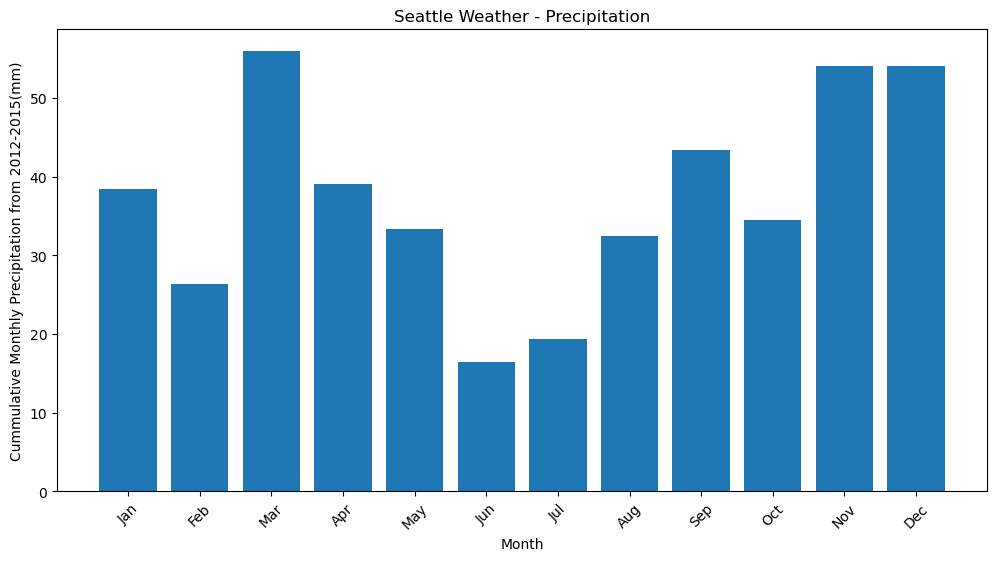

In [21]:
# Extract the month and precipitation columns
months = pd.to_datetime(dataset['date']).dt.month
precipitation = dataset['precipitation']

# Create a bar plot for precipitation
plt.bar(months, precipitation)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Cummulative Monthly Precipitation from 2012-2015(mm)')
plt.title('Seattle Weather - Precipitation')

# Set x-axis tick labels to month names
month_names = pd.date_range(start='1/1/2022', periods=12, freq='M').strftime('%b')
plt.xticks(range(1, 13), month_names, rotation=45)

# Display the plot
plt.show()


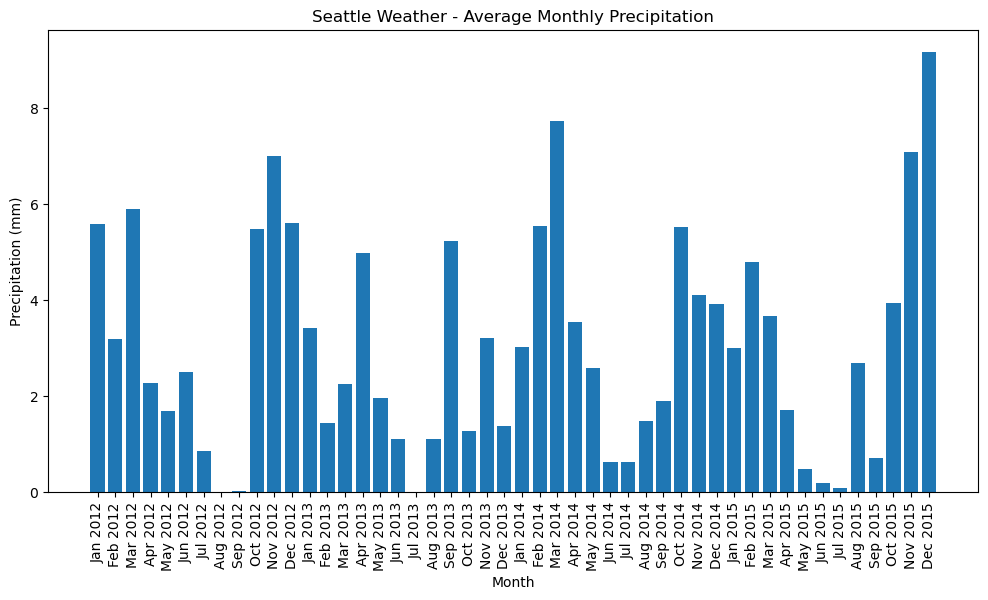

In [22]:
# Extract the month, year, and precipitation columns
dates = pd.to_datetime(dataset['date'])
months = dates.dt.month
years = dates.dt.year
precipitation = dataset['precipitation']

# Group the data by year and month and calculate the average precipitation
monthly_avg_precipitation = dataset.groupby([years, months])['precipitation'].mean()

# Create a bar plot for precipitation
x = range(len(monthly_avg_precipitation))
plt.bar(x, monthly_avg_precipitation)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.title('Seattle Weather - Average Monthly Precipitation')

# Set x-axis tick locations and labels
tick_locations = range(0, len(monthly_avg_precipitation))
tick_labels = pd.date_range(start='2012-01-01', end='2015-12-01', freq='MS').strftime('%b %Y')


# Set the ticks and labels
plt.xticks(tick_locations, tick_labels, rotation=90)

# Display the plot
plt.show()

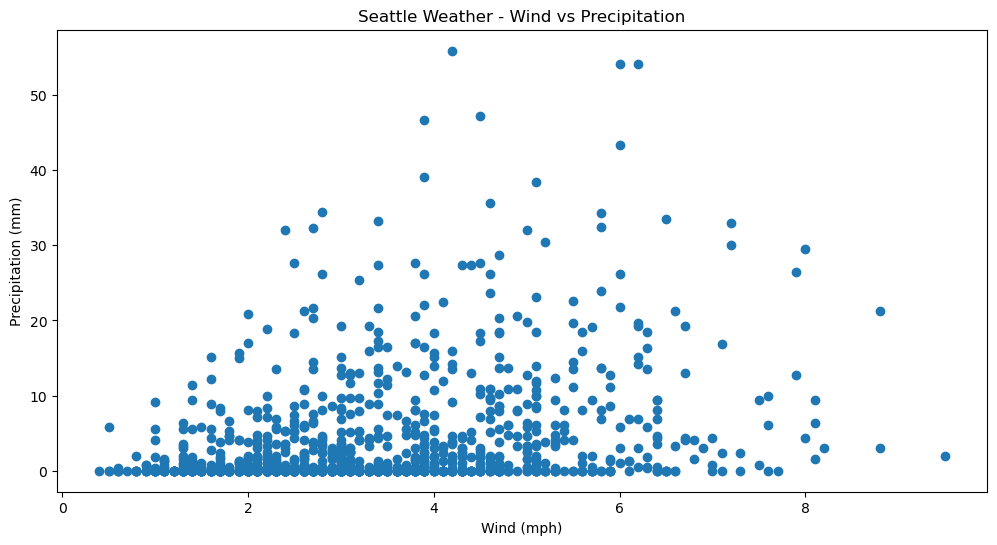

In [24]:
# Extract the wind and precipitation columns
wind = dataset['wind']
precipitation = dataset['precipitation']

# Create a scatter plot for wind and precipitation
plt.scatter(wind, precipitation)

# Add labels and title
plt.xlabel('Wind (mph)')
plt.ylabel('Precipitation (mm)')
plt.title('Seattle Weather - Wind vs Precipitation')

# Display the plot
plt.show()

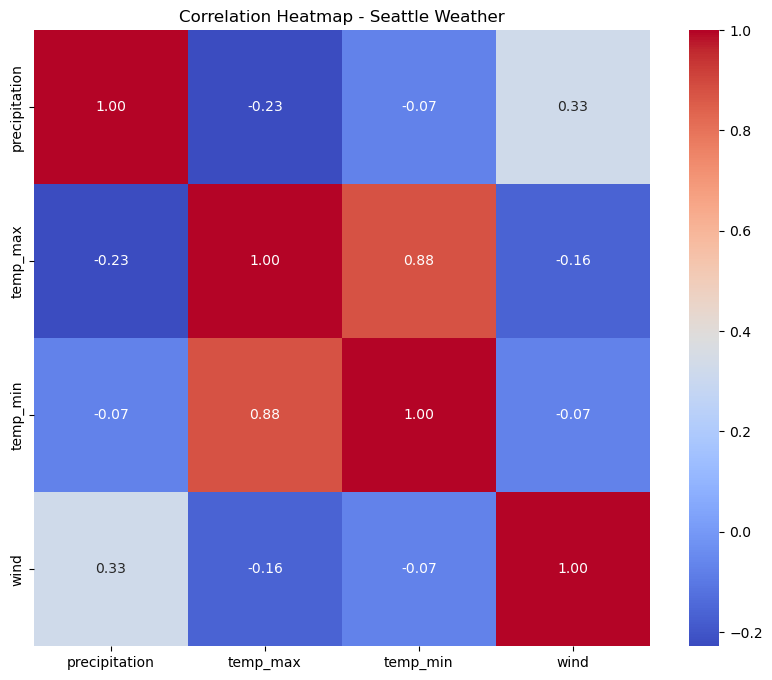

In [26]:
import seaborn as sns

# Select only numeric columns
numeric_columns = dataset.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap - Seattle Weather")
plt.show()

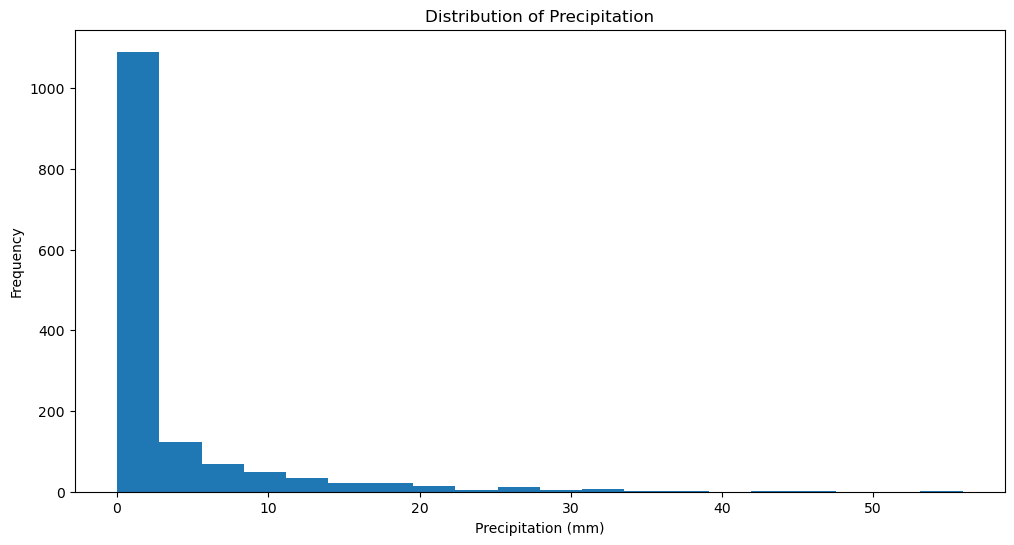

In [32]:

# Extract the precipitation column
precipitation = dataset['precipitation']

# Create a histogram
plt.hist(precipitation, bins=20)

# Add labels and title
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation')

# Display the plot
plt.show()

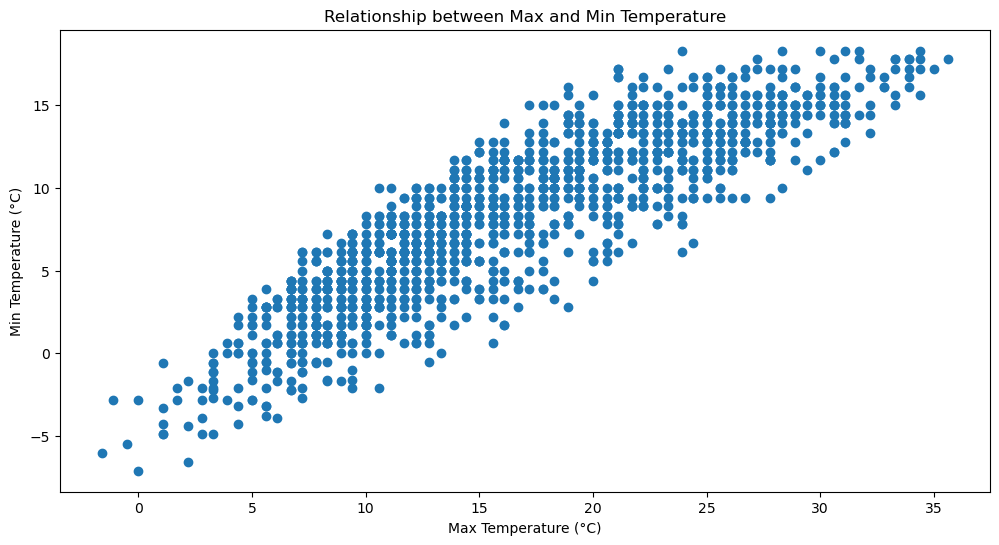

In [33]:
# Extract the temperature columns
temp_max = dataset['temp_max']
temp_min = dataset['temp_min']

# Create a scatter plot
plt.scatter(temp_max, temp_min)

# Add labels and title
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Min Temperature (°C)')
plt.title('Relationship between Max and Min Temperature')

# Display the plot
plt.show()

In [28]:
# Determine the unique values in a specific attribute
print(dataset['precipitation'].unique())

[ 0.  10.9  0.8 20.3  1.3  2.5  4.3  1.   4.1  5.3  8.1 19.8 15.2 13.5
  3.   6.1  8.6  4.8 27.7  3.6  1.8  0.3  2.8 11.4 17.3  6.4  2.   6.9
  0.5 10.4 13.7 19.3  9.4 23.9  8.4 27.4  5.6 13.2  1.5  4.6  2.3  6.6
 10.7  3.8 18.5 14.  16.  16.5 15.7  5.8  7.9 20.8  8.9  7.1 23.1 34.5
 14.5  9.7 54.1 11.2 32.  35.6 19.6 13.  14.2 22.6  3.3 16.3 38.4  5.1
 11.9  7.4 11.7  9.9 12.7 39.1 20.6 21.3 43.4 16.8  9.1 30.  26.2 12.2
 21.6 18.3 17.  26.4 19.1 46.7 32.3 18.8 22.1 12.4 33.3  7.6 15.  25.4
 34.3 10.2 23.6 55.9 30.5 32.5 28.7 33.  33.5 47.2 22.4 29.5 21.8]


In [34]:
# Step 3: Data Preprocessing

# Adjust data types
dataset['date'] = pd.to_datetime(dataset['date']) 
#Importance: Date-based calculations,Sorting and filtering by date, Time-based visualizationDate-based grouping and aggregation
dataset['weather'] = dataset['weather'].astype('category')

In [35]:
# Perform data transformations or feature engineering if required
#This step allows you to manipulate the existing data or create new features that can potentially improve the performance of your machine learning model.
#Data transformations or feature engineering can involve various operations, such as:
# Scaling or Normalization, Logarithmic or Exponential Transformations -- to certain features to achieve a more linear relationship or reduce the effect of outliers, Binning or Discretization, Interaction Terms or Polynomial Features, Dimensionality Reduction, 
# In this case, we use it for Time-based Features: Extracting additional time-related features from the 'date' column, such as day of the week, season, or time of day, that could potentially capture patterns or trends.
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day

In [36]:
# Encode categorical variables using one-hot encoding
# used to transform categorical variables into a numerical representation that machine learning algorithms can process effectively.
dataset_encoded = pd.get_dummies(dataset, columns=['weather'], prefix='weather', drop_first=True)

In [37]:
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,5


In [38]:
dataset.tail(10)

,date,precipitation,temp_max,temp_min,wind,weather,month,day
1451,2015-12-22,4.6,7.8,2.8,5.0,rain,12,22
1452,2015-12-23,6.1,5.0,2.8,7.6,rain,12,23
1453,2015-12-24,2.5,5.6,2.2,4.3,rain,12,24
1454,2015-12-25,5.8,5.0,2.2,1.5,rain,12,25
1455,2015-12-26,0.0,4.4,0.0,2.5,sun,12,26
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,12,30
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun,12,31


In [39]:
# Check if 'weather' column was successfully encoded
if 'weather' in dataset_encoded.columns:
    # Split the dataset into features and target variable
    features = ['precipitation', 'temp_max', 'temp_min', 'wind', 'month', 'day']
    target = [col for col in dataset_encoded.columns if col.startswith('weather_')]
    
    X = dataset_encoded[features]
    y = dataset_encoded[target]
else:
    print("Error: 'weather' column was not successfully encoded.")

Error: 'weather' column was not successfully encoded.


In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode categorical variables using LabelEncoder and OneHotEncoder
label_encoder = LabelEncoder()
dataset['weather_encoded'] = label_encoder.fit_transform(dataset['weather'])

onehot_encoder = OneHotEncoder(sparse=False)
weather_encoded = onehot_encoder.fit_transform(dataset[['weather_encoded']])


/Users/denniskinoti/anaconda3/envs/new_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
# Create a DataFrame for the encoded weather categories
weather_encoded_df = pd.DataFrame(weather_encoded, columns=label_encoder.classes_)

In [44]:
# Concatenate the encoded weather DataFrame with the original dataset
dataset_encoded = pd.concat([dataset, weather_encoded_df], axis=1)

In [45]:
# Split the dataset into features and target variable
features = ['precipitation', 'temp_max', 'temp_min', 'wind', 'month', 'day']
target = ['drizzle', 'rain', 'sun', 'snow', 'fog']

X = dataset_encoded[features]
y = dataset_encoded[target]

In [46]:
# Create a new column 'combined_weather' by combining multiple weather conditions
dataset_encoded['combined_weather'] = dataset_encoded[['drizzle', 'rain', 'sun', 'snow', 'fog']].idxmax(axis=1)

# Split the dataset into features and target variable
X = dataset_encoded[features]
y = dataset_encoded['combined_weather']

In [51]:
from sklearn.model_selection import train_test_split #for splitting the dataset
from sklearn.tree import DecisionTreeClassifier # machine learning algorithm 1
from sklearn.tree import DecisionTreeClassifier # machine learning algorithm 2
from sklearn.ensemble import RandomForestClassifier # machine learning algorithm 3
from sklearn.linear_model import LogisticRegression # machine learning algorithm 4
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score #for evaluating the model's performance
from sklearn.preprocessing import StandardScaler


# Step 4: Model Training and Evaluation


# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list of classifiers
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42, multi_class='auto'),
    SVC(random_state=42)
]

#we added multi_class='auto' as a parameter in the LogisticRegression model to handle the multi-class classification scenario with the original categorical target variable.

# Each classifier is trained and evaluated separately
# After splitting the dataset into training and testing subsets, we iterate over each classifier in the classifiers list
# For each classifier, we train the model on the training data, make predictions on the testing data, and calculate the accuracy of the predictions using accuracy_score. 
# After calculating the accuracy using accuracy_score, we calculate the F1 score by passing the average='weighted' parameter, which computes the weighted average F1 score considering class imbalance.
# The accuracy and F1 score of each classifier is then printed.


# Train and evaluate each classifier
for clf in classifiers:
    # Train the model on the scaled training data
    clf.fit(X_train_scaled, y_train)

    # Make predictions on the scaled testing data
    y_pred = clf.predict(X_test_scaled)

    # Evaluate the model's performance using accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf.__class__.__name__} Accuracy: {accuracy:.4f}")

    # Evaluate the model's performance using F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{clf.__class__.__name__} F1 Score: {f1:.4f}")

DecisionTreeClassifier Accuracy: 0.7426
DecisionTreeClassifier F1 Score: 0.7532
RandomForestClassifier Accuracy: 0.8428
RandomForestClassifier F1 Score: 0.8138
LogisticRegression Accuracy: 0.7927
LogisticRegression F1 Score: 0.7456
SVC Accuracy: 0.7585
SVC F1 Score: 0.7101


In [55]:
from tabulate import tabulate # to create a table


# Store the results of each classifier
results = [
    ("Decision Tree", 0.7426, 0.7532),
    ("Random Forest", 0.8428, 0.8138),
    ("Logistic Regression", 0.7927, 0.7456),
    ("Support Vector Machine", 0.7585, 0.7101)
]

# Create a table to compare the results
headers = ["Classifier", "Accuracy", "F1 Score"]
table = tabulate(results, headers=headers, tablefmt="grid")
print(table)

# Find the best model based on the highest accuracy
best_model = max(results, key=lambda x: x[1])
print(f"\nBest Model: {best_model[0]}, Accuracy: {best_model[1]:.4f}, F1 Score: {best_model[2]:.4f}")

+------------------------+------------+------------+
| Classifier             |   Accuracy |   F1 Score |
+========================+============+============+
| Decision Tree          |     0.7426 |     0.7532 |
+------------------------+------------+------------+
| Random Forest          |     0.8428 |     0.8138 |
+------------------------+------------+------------+
| Logistic Regression    |     0.7927 |     0.7456 |
+------------------------+------------+------------+
| Support Vector Machine |     0.7585 |     0.7101 |
+------------------------+------------+------------+

Best Model: Random Forest, Accuracy: 0.8428, F1 Score: 0.8138


In [56]:
# Step 5: Train the selected best model on the entire dataset

# Initialize the Random Forest classifier
best_model = RandomForestClassifier(random_state=42)

# Train the best model on the entire dataset
best_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [58]:
# Step 6: Predictin

# From  the original dataset("seattle_weather.csv"), we need to create a dataset without the weather column details for the month of October

# Recall we converted the 'date' column to datetime using the code below:
# dataset['date'] = pd.to_datetime(dataset['date'])

# We also perform data transformation below:
# Extract the month from the 'date' column
# dataset['month'] = dataset['date'].dt.month

# NOW... 


# Step a: Filter out rows where 'month' is not equal to October
dataset_october = dataset[dataset['month'] == 10]

# Step b: Delete the 'weather' column from the filtered dataset
dataset_october = dataset_october.drop('weather', axis=1)

# Step c: Save the dataset without weather column details for October to a new CSV file
dataset_october.to_csv("seattle_weather_for_october.csv", index=False)


In [59]:
# Step 5: Make predictions for the months of October

# Load the dataset without weather column details for October
dataset_october = pd.read_csv("seattle_weather_for_october.csv")

# Extract the features for October
X_october = dataset_october[features]

# Make predictions for October
y_pred_october = best_model.predict(X_october)

# Display the predicted weather conditions for October
predicted_data_october = dataset_october.copy()
predicted_data_october['weather'] = y_pred_october

print("Predicted Weather Conditions for October:")
print(predicted_data_october)

Predicted Weather Conditions for October:
           date  precipitation  temp_max  temp_min  wind  month  day  \
0    2012-10-01            0.0      23.3       8.9   3.0     10    1   
1    2012-10-02            0.0      17.8      10.0   4.1     10    2   
2    2012-10-03            0.0      18.9       7.8   7.3     10    3   
3    2012-10-04            0.0      18.9       8.3   6.5     10    4   
4    2012-10-05            0.0      21.7       8.9   5.7     10    5   
..          ...            ...       ...       ...   ...    ...  ...   
119  2015-10-27            0.0      16.1       7.8   1.7     10   27   
120  2015-10-28            3.3      13.9      11.1   2.8     10   28   
121  2015-10-29            1.8      15.0      12.2   4.7     10   29   
122  2015-10-30           19.3      17.2      11.7   6.7     10   30   
123  2015-10-31           33.0      15.6      11.7   7.2     10   31   

     weather_encoded weather  
0                  4     sun  
1                  4     sun  


In [60]:
dataset_october.head()

,date,precipitation,temp_max,temp_min,wind,month,day,weather_encoded
0,2012-10-01,0.0,23.3,8.9,3.0,10,1,4
1,2012-10-02,0.0,17.8,10.0,4.1,10,2,4
2,2012-10-03,0.0,18.9,7.8,7.3,10,3,4
3,2012-10-04,0.0,18.9,8.3,6.5,10,4,4
4,2012-10-05,0.0,21.7,8.9,5.7,10,5,4


In [63]:
# Load the actual weather data
actual_data = pd.read_csv("seattle_weather.csv")

# Filter the actual weather data for October
actual_data_october = actual_data[actual_data['date'].str.contains('-10-')]
actual_weather_october = actual_data_october['weather']

# Load the predicted weather data for October
predicted_data_october = pd.read_csv("seattle_weather_for_october.csv")

# Extract the features for October
X_october = predicted_data_october[features]

# Make predictions for October
y_pred_october = best_model.predict(X_october)

In [64]:
# Filter the predicted weather data for October
y_pred_october = y_pred_october[:len(actual_weather_october)]

In [65]:
accuracy_october = accuracy_score(actual_weather_october, y_pred_october)
f1_october = f1_score(actual_weather_october, y_pred_october, average='weighted')

print(f"\nAccuracy for October: {accuracy_october:.4f}")
print(f"F1 Score for October: {f1_october:.4f}")


Accuracy for October: 1.0000
F1 Score for October: 1.0000
